In [1]:
!pwd

/home/ubuntu/fastai/courses/dl1


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/matplotlib/__init__.py:1067: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [4]:
from fastai.imports import *

In [5]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [6]:
PATH = "data/seedlings"
sz=224

In [7]:
torch.cuda.is_available()

True

In [8]:
torch.backends.cudnn.enabled

True

In [9]:
os.listdir(PATH)

['train', 'tmp', 'models', 'valid', 'test', 'sub']

In [10]:
os.listdir(f'{PATH}/valid')

['Charlock',
 'Cleavers',
 'Fat Hen',
 'Common wheat',
 'Small-flowered Cranesbill',
 'Shepherds Purse',
 'Scentless Mayweed',
 'Maize',
 'Black-grass',
 'Sugar beet',
 'Common Chickweed',
 'Loose Silky-bent']

In [13]:
files = os.listdir(f'{PATH}/valid/Charlock')[:4]
files

['d04eff450.png', '09f038ce4.png', '1fb63feb5.png', '410598462.png']

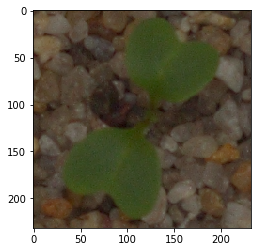

In [15]:
img = plt.imread(f'{PATH}/valid/Charlock/{files[3]}')
plt.imshow(img);

In [16]:
tfms = tfms_from_model(resnet50, sz, aug_tfms=transforms_top_down, max_zoom=1.1)

In [17]:
arch=resnet50
data = ImageClassifierData.from_paths(PATH, bs= 32,tfms=tfms_from_model(arch, sz), test_name="test")
learn = ConvLearner.pretrained(arch, data, precompute=True)


In [18]:
lrf=learn.lr_find()

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 79%|███████▉  | 94/119 [00:03<00:00, 30.12it/s, loss=11]  


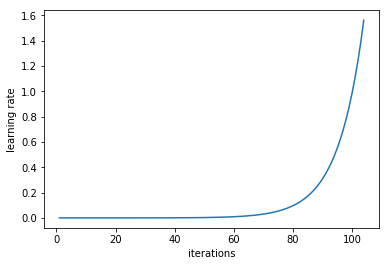

In [9]:
learn.sched.plot_lr()

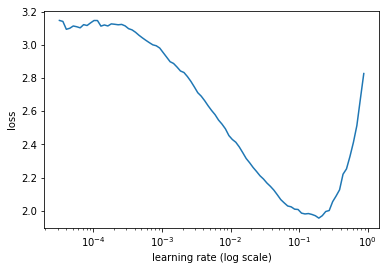

In [10]:
learn.sched.plot()

In [19]:
learn.fit(0.05,5 )

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      1.324324   0.747574   0.750658  
    1      0.875266   0.553317   0.808662                    
    2      0.568513   0.476908   0.833662                    
    3      0.530001   0.384461   0.872204                    
    4      0.4251     0.40449    0.860746                    



[0.40449047, 0.8607456147670746]

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 77%|███████▋  | 92/119 [00:01<00:00, 62.93it/s, loss=1.41] 


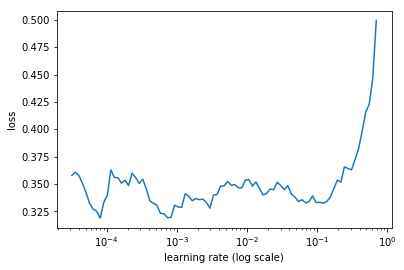

In [12]:
lrf=learn.lr_find()
learn.sched.plot()

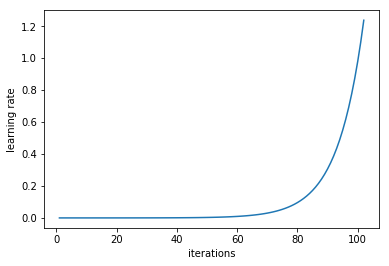

In [13]:
learn.sched.plot_lr()

In [20]:
learn.precompute=False

In [21]:
#learn.fit(0.01,3 )

In [22]:
learn.fit(0.01, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.285697   0.343178   0.886787  
    1      0.278077   0.340708   0.886787                    
    2      0.254739   0.332065   0.884704                    



[0.33206546, 0.8847039481004079]

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 88%|████████▊ | 105/119 [01:26<00:11,  1.21it/s, loss=5.11]

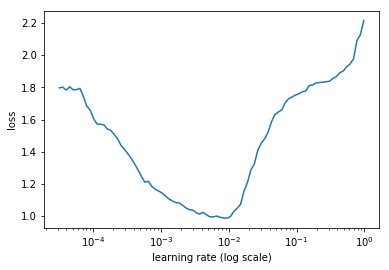

In [19]:
lrf=learn.lr_find()
learn.sched.plot()

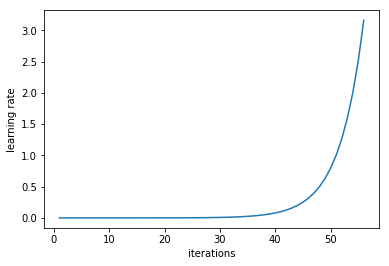

In [15]:
learn.sched.plot_lr()

In [23]:
learn.unfreeze()

In [24]:
lr=np.array([1e-4,1e-3,1e-2])

In [25]:
learn.fit(lr, 3, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                    
    0      0.39457    0.198737   0.913871  
    1      0.225669   0.176611   0.929496                    
    2      0.124685   0.15965    0.936787                    



[0.15964998, 0.9367872814337412]

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 62%|██████▏   | 37/60 [00:57<00:35,  1.54s/it, loss=0.301] 

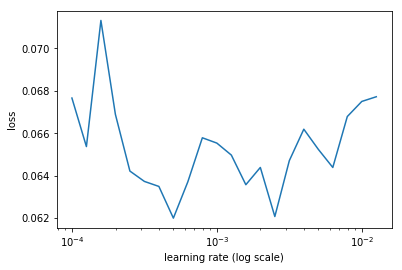

In [38]:
lrf=learn.lr_find()
learn.sched.plot()

In [20]:
learn.fit(lr, 1, cycle_len=1)

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.147507   0.232188   0.925776  



[0.23218837, 0.9257761438687643]

In [21]:
learn.fit(lr,3)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                  
    0      0.132507   0.214942   0.927859  
    1      0.102347   0.191098   0.929167                   
    2      0.067427   0.193031   0.924734                   



[0.19303122, 0.9247344772020976]

In [22]:
learn.fit(lr, 2, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                     
    0      0.096509   0.150768   0.947917  
    1      0.060991   0.14481    0.95625                      
    2      0.042266   0.140109   0.954167                     



[0.14010857, 0.9541666666666667]

In [27]:
learn.save('first_save')

In [28]:
learn.fit(lr, 2, cycle_len=1, cycle_mult=2)

HBox(children=(IntProgress(value=0, description='Epoch', max=3), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      0.026826   0.186076   0.933844  
    1      0.022566   0.179198   0.935151                   
    2      0.018186   0.181764   0.936969                   



[0.18176444, 0.9369689544041951]

In [23]:
learn.fit(0.001,4)

HBox(children=(IntProgress(value=0, description='Epoch', max=4), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                   
    0      0.015091   0.201209   0.937234  
    1      0.013689   0.196743   0.939583                   


KeyboardInterrupt: 

In [29]:
learn.save('first_save')

In [33]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)

In [ ]:
preds = np.argmax(probs, axis=1)
probs = probs[:,1]

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

In [ ]:
plot_confusion_matrix(cm, data.classes)

# Submission


In [23]:
log_preds,y = learn.TTA(is_test=True)
probs = np.mean(np.exp(log_preds),0)

In [62]:
probs.shape

(794, 12)

In [28]:
type(probs)

numpy.ndarray

In [63]:
probs.argmax(1)

array([10,  5,  5,  0,  7, 10,  4, 11,  6,  3,  1,  5,  1,  5,  5,  4,  6,  3, 10,  3, 10,  5,  1,  6, 11,
        5,  2,  6,  0,  3,  5, 11,  7,  4,  3,  1,  6,  3, 10, 11,  3,  6, 10,  3,  6,  9, 11,  2,  5,  2,
        8,  3,  0, 10,  5,  3,  3,  6,  6,  3, 11,  8,  7,  6, 10,  3,  9,  8,  7, 11, 11,  1,  3,  0, 10,
        6,  5,  3,  3,  7,  4,  7, 10,  8,  6,  6, 10,  8,  6,  5,  6,  4,  5,  5,  6, 10, 11,  6,  3, 10,
        9,  5,  9, 11, 10,  3,  1, 10, 11,  6,  4,  3, 10,  6,  7,  3, 10,  1,  6,  6,  5,  7,  5,  6, 11,
        7,  3,  2,  2,  5,  4,  8,  8,  2,  8,  3,  6,  3,  3,  7,  0,  6,  8, 11,  1,  5,  9,  5,  8,  0,
        7,  5,  9,  3,  4,  2,  7,  9,  6,  6, 10,  5,  3,  3,  4,  3,  5,  9,  2,  1,  1,  2,  1,  8,  1,
        6, 11,  3,  6,  2,  6,  6,  6, 11,  2,  3,  4,  7,  6,  5,  9,  3,  2,  7,  1,  3,  9,  6, 11,  6,
        5,  3, 10,  6,  3, 10,  1, 10,  6,  4,  0,  2, 11,  8, 10,  6,  8,  6,  7, 10,  8, 11,  3,  3,  7,
       10,  2, 11,  1,  6,  6, 11,  6

In [39]:
data.classes[11]

'Sugar beet'

In [24]:
data.test_ds.fnames[0]

'test/93d76fd5d.png'

In [24]:
fnames  = []

for fname in data.test_ds.fnames:
    fnames.append(fname[5:])

In [25]:
#display first 5
fnames[0:5]

['93d76fd5d.png',
 '12625488b.png',
 'b3e08b037.png',
 'e98e5d1d5.png',
 '55fed435f.png']

In [26]:
species = []
for prob in probs.argmax(1):
    species.append(data.classes[prob])

In [27]:
species[:5]

['Small-flowered Cranesbill', 'Fat Hen', 'Fat Hen', 'Black-grass', 'Maize']

In [28]:
subm = dict(zip(fnames,species))

In [29]:
df = pd.DataFrame.from_dict(subm, 'index')
df.columns = ['species']
df.index.rename('file', inplace=True)

In [30]:
df.head()

,species
file,
93d76fd5d.png,Small-flowered Cranesbill
12625488b.png,Fat Hen
b3e08b037.png,Fat Hen
e98e5d1d5.png,Black-grass
55fed435f.png,Maize


In [31]:
SUBM = f'{PATH}/sub/'
os.makedirs(SUBM, exist_ok=True)
df.to_csv(f'{SUBM}subm.gz', compression='gzip')

In [32]:
FileLink(f'{SUBM}subm.gz')

/home/ubuntu/fastai/courses/dl1/data/seedlings/sub/subm.gz